In [164]:
# in this code I added 2 models 
#The k-nearest neighbors (KNN)
# Support Vector Machines-SVM

# The k-nearest neighbors (KNN)

In [165]:
#pip install imbalanced-learn

In [166]:
import pandas as pd
from scipy.io import arff
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
#Diviser le data entre deux partie (train ,test)
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.io import arff
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
#
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
#
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
#
from sklearn import svm
from sklearn.metrics import accuracy_score

In [167]:
df = pd.read_csv("C:/Tempp/cind820/diabetes.csv")

In [168]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [169]:
df.isnull().sum()  # Sum of missing values per column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [170]:
#How many “zeros” are in each column of the data frame (df)?
for colname in df.columns[:8]:
    print('0s in "{variable}": {count}'.format(
        variable=colname,
        count=np.count_nonzero(df[colname] == 0)))

0s in "Pregnancies": 111
0s in "Glucose": 5
0s in "BloodPressure": 35
0s in "SkinThickness": 227
0s in "Insulin": 374
0s in "BMI": 11
0s in "DiabetesPedigreeFunction": 0
0s in "Age": 0


In [171]:
# now replacing zero values with the mean of the column
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [172]:
#How many “zeros” are in each column of the data frame (df)?
for colname in df.columns[:8]:
    print('0s in "{variable}": {count}'.format(
        variable=colname,
        count=np.count_nonzero(df[colname] == 0)))

0s in "Pregnancies": 111
0s in "Glucose": 0
0s in "BloodPressure": 0
0s in "SkinThickness": 0
0s in "Insulin": 0
0s in "BMI": 0
0s in "DiabetesPedigreeFunction": 0
0s in "Age": 0


Diviser le data entre X et Y :
X : pour les colonnes d’entrer
Y : pour la colonne de outcome

In [173]:
target_name ="Outcome"

In [174]:
Y = df[target_name]
X = df.drop(target_name, axis=1)

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
df['Outcome'].value_counts() # counting how many diabetes (1) and no diabetes (0)

Outcome
0    500
1    268
Name: count, dtype: int64

In [177]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


In [178]:
data_copy = df.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [179]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"], axis =1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [180]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496


In [181]:
y =data_copy.Outcome

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42, stratify=y)

In [183]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    

In [184]:
max_test_score =max(test_scores)


In [185]:
test_score_index = [i for i, v in enumerate(test_scores) if v== max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_index))))

Max test score 74.609375 % and k = [11]


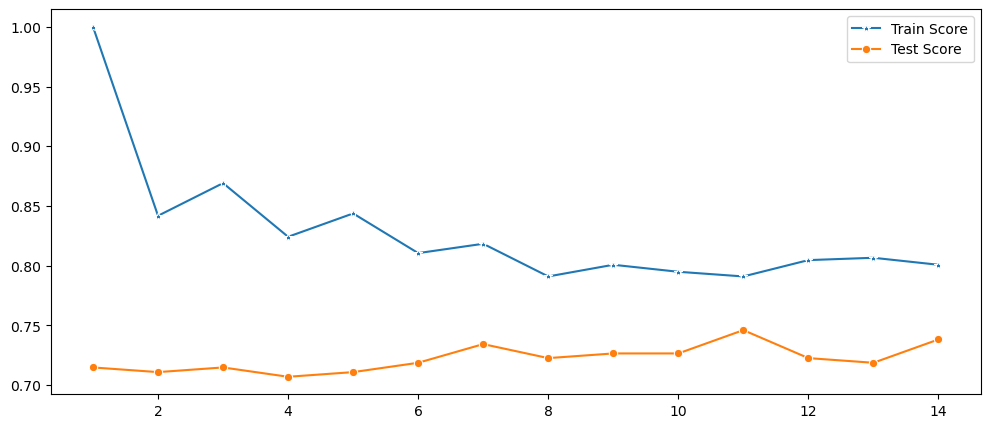

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')


In [187]:
# K=11
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.74609375

In [188]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

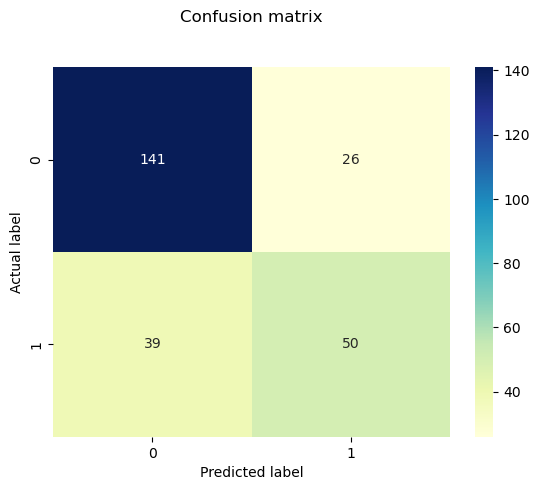

In [189]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [190]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results



model_evaluation(y_test, y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,KNN,0.746094,0.657895,0.561798,0.606061,0.578704


In [191]:
# Alternate way
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       167
           1       0.66      0.56      0.61        89

    accuracy                           0.75       256
   macro avg       0.72      0.70      0.71       256
weighted avg       0.74      0.75      0.74       256



In [192]:
# Support Vector Machines-SVM


# Support Vector Machines-SVM


In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=2)

In [194]:
print(X.shape,X_train.shape,X_test.shape) 


(768, 8) (614, 8) (154, 8)


In [195]:
#Model Training
classifier=svm.SVC(kernel='linear')

In [196]:
#Training the SVM Classifier

classifier.fit(X_train,y_train)


SVC(kernel='linear')

In [197]:
# accuracy_score of training data

X_train_prediction=classifier.predict(X_train)
training_data_accuracy_score=accuracy_score(y_train,X_train_prediction)
print(f"Accuracy Score of training data : {training_data_accuracy_score * 100} %")

Accuracy Score of training data : 78.0130293159609 %


In [198]:
# accuracy_score of testing data

X_test_prediction=classifier.predict(X_test)
testing_data_accuracy_score=accuracy_score(y_test,X_test_prediction)
print(f"Accuracy Score of testing data: {testing_data_accuracy_score * 100:.3f} %")


Accuracy Score of testing data: 77.922 %


In [199]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assume X, y are your features and target variable respectively

# Initialize a StandardScaler
scaler = StandardScaler()

# Fit the scaler on the entire dataset and then transform both the features
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets using the `train_test_split` function.
# The testing set contains 20% of the data, and stratify=y ensures balanced classes in both sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=2)

# Initialize an SVM classifier with a linear kernel
classifier = SVC(kernel='linear')

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Predictions on training and testing data
X_train_prediction = classifier.predict(X_train)
X_test_prediction = classifier.predict(X_test)

# Calculate accuracy scores
training_data_accuracy_score = accuracy_score(y_train, X_train_prediction)
testing_data_accuracy_score = accuracy_score(y_test, X_test_prediction)

# Print results
print("Cross-validation scores:", [round(score, 3) for score in cv_scores])

print("Mean cross-validation score: {:.3f}".format(cv_scores.mean()))
print(f"Accuracy Score of training data: {training_data_accuracy_score * 100:.3f} %")

# Print accuracy score of testing data 
print(f"Accuracy Score of testing data: {testing_data_accuracy_score * 100:.3f} %")

Cross-validation scores: [0.78, 0.748, 0.78, 0.821, 0.713]
Mean cross-validation score: 0.769
Accuracy Score of training data: 78.013 %
Accuracy Score of testing data: 77.922 %


In [200]:
#Saving the Trained Model


In [201]:
import pickle
filename="diabetesmodel.sav"
pickle.dump(classifier,open(filename,'wb'))

In [202]:
# loading the saved model
loaded_model=pickle.load(open("diabetesmodel.sav",'rb'))

In [203]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Define the input data as a tuple
input_data = (1, 85, 66, 29, 0, 26.6, 0.351, 31)

# Convert input data to a numpy array
inp_data_as_numpy_arr = np.asarray(input_data)
print(f"1D Data : {inp_data_as_numpy_arr}\n")
# Reshape the input data to a 2D array
inp_data_reshape = inp_data_as_numpy_arr.reshape(1, -1)
print(f"2D Data : {inp_data_reshape}\n")
# Provide feature names to the input data
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
inp_data_df = pd.DataFrame(inp_data_reshape, columns=columns)

# Predict using the loaded model
prediction = loaded_model.predict(inp_data_df)

# Print the predicted value
print(f"Predicted Value: {prediction}")

# Print interpretation based on prediction
if prediction[0] == 0:
    print("This person is Non-Diabetic")
else:
    print("This person is Diabetic")


1D Data : [ 1.    85.    66.    29.     0.    26.6    0.351 31.   ]

2D Data : [[ 1.    85.    66.    29.     0.    26.6    0.351 31.   ]]

Predicted Value: [1]
This person is Diabetic
